In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Importando imagem

In [5]:
img = cv.imread("embrace_the_absurd.jpeg")

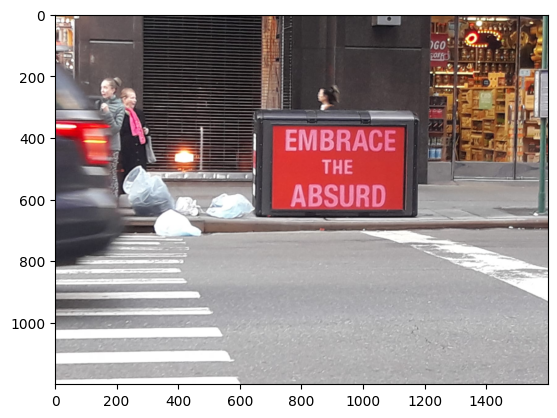

In [21]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## Thresholding

In [7]:
grayscales = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

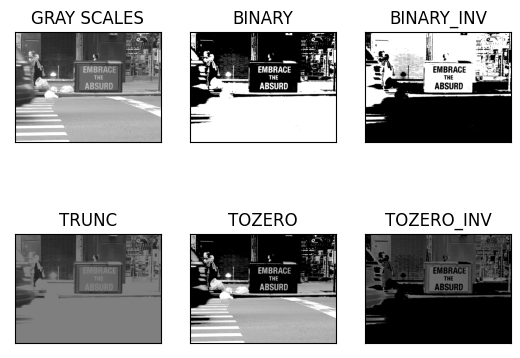

In [25]:
ret,thresh1 = cv.threshold(grayscales,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(grayscales,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(grayscales,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(grayscales,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(grayscales,127,255,cv.THRESH_TOZERO_INV)
titles = ['GRAY SCALES','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [grayscales, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Gradientes e Blurring

### Blurring

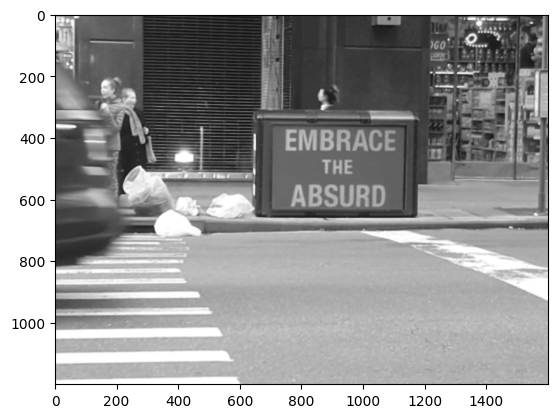

In [54]:
bilateralBlur = cv.bilateralFilter(grayscales,9,75,75)
plt.imshow(bilateralBlur,'gray',vmin=0,vmax=255)

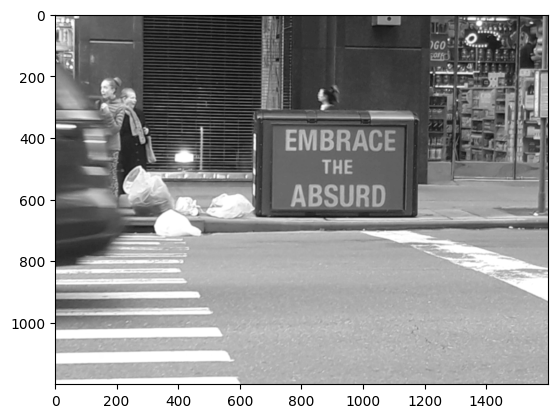

In [141]:
gaussianBlur = cv.GaussianBlur(grayscales,(5,5),0)
plt.imshow(gaussianBlur,'gray',vmin=0,vmax=255)

### Gradientes - Original

In [145]:
laplacian = cv.Laplacian(grayscales,cv.CV_64F)
sobelx = cv.Sobel(grayscales,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(grayscales,cv.CV_64F,0,1,ksize=5)

(Text(0.5, 1.0, 'Original'), ([], []), ([], []))

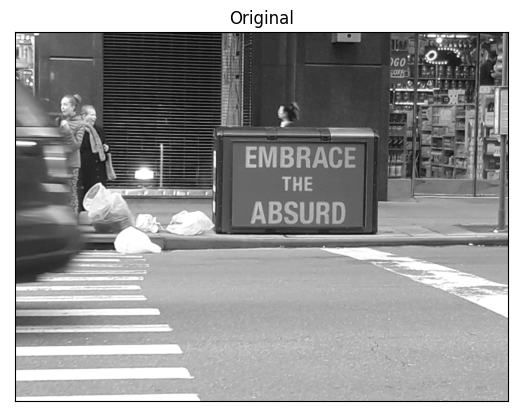

In [146]:
plt.plot(2,2,1),plt.imshow(grayscales,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

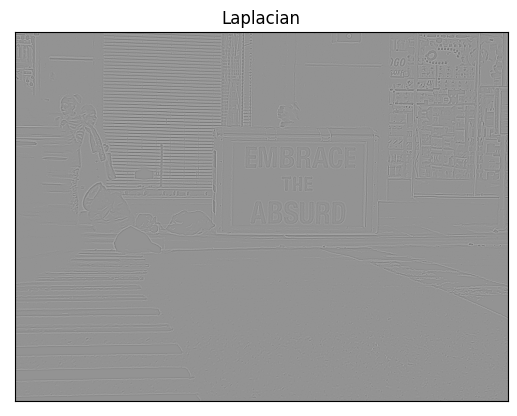

In [147]:
plt.plot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel X'), ([], []), ([], []))

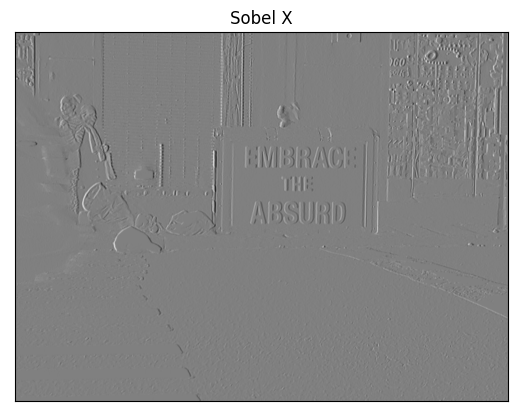

In [148]:
plt.plot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

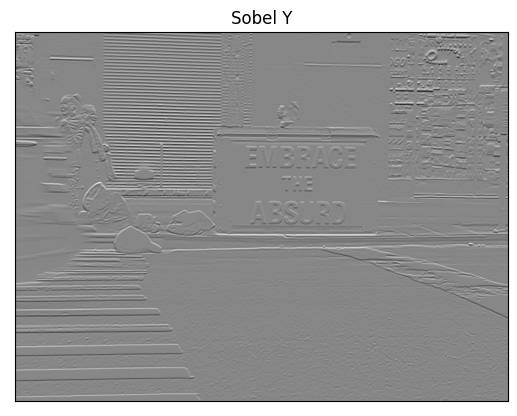

In [149]:
plt.plot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

### Gradientes - Gaussiana

In [150]:
laplacian = cv.Laplacian(gaussianBlur,cv.CV_64F)
sobelx = cv.Sobel(gaussianBlur,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(gaussianBlur,cv.CV_64F,0,1,ksize=5)

(Text(0.5, 1.0, 'Original'), ([], []), ([], []))

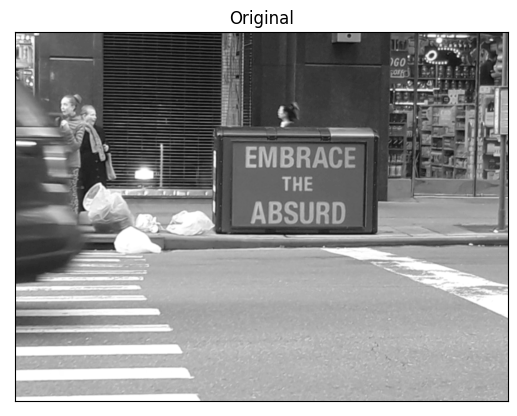

In [151]:
plt.plot(2,2,1),plt.imshow(gaussianBlur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

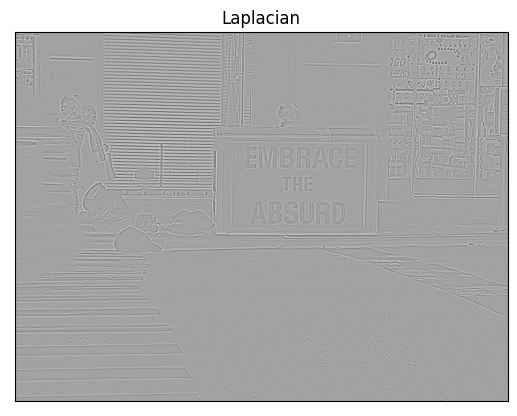

In [152]:
plt.plot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel X'), ([], []), ([], []))

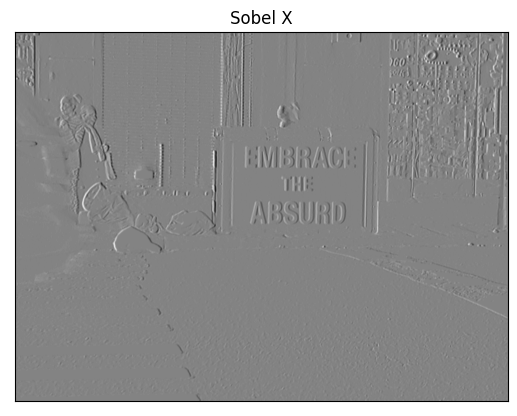

In [153]:
plt.plot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

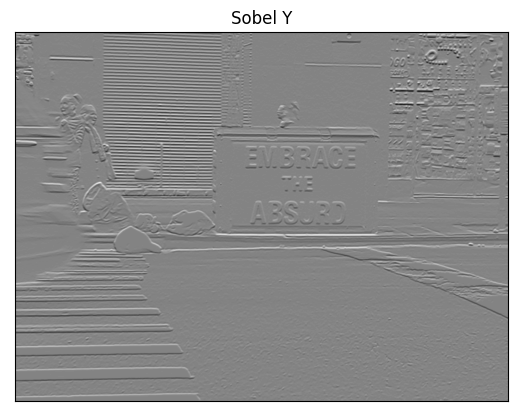

In [154]:
plt.plot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

### Gradiente - Bilateral

In [155]:
laplacian = cv.Laplacian(bilateralBlur,cv.CV_64F)
sobelx = cv.Sobel(bilateralBlur,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(bilateralBlur,cv.CV_64F,0,1,ksize=5)

(Text(0.5, 1.0, 'Original'), ([], []), ([], []))

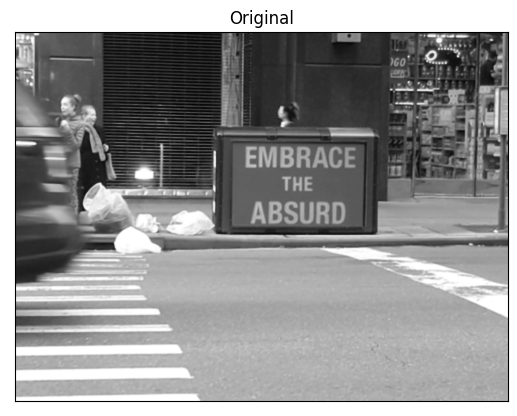

In [156]:
plt.plot(2,2,1),plt.imshow(bilateralBlur,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

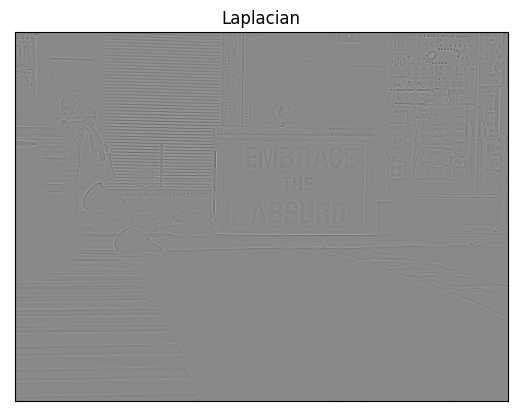

In [157]:
plt.plot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel X'), ([], []), ([], []))

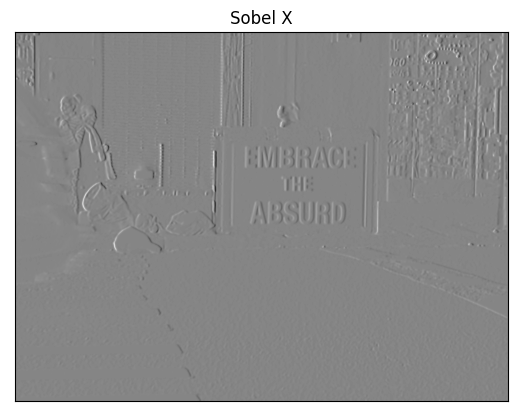

In [158]:
plt.plot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

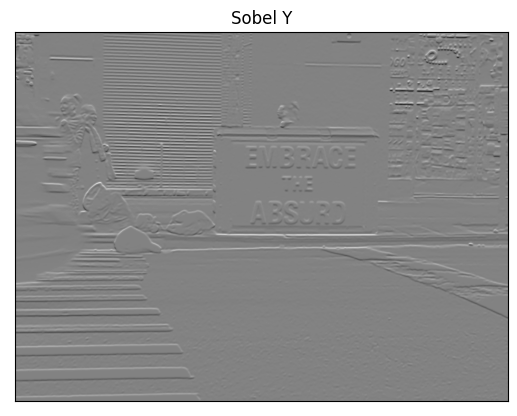

In [159]:
plt.plot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

## Gradiente com thresholding

(Text(0.5, 1.0, 'Gradiente com thresholding'), ([], []), ([], []))

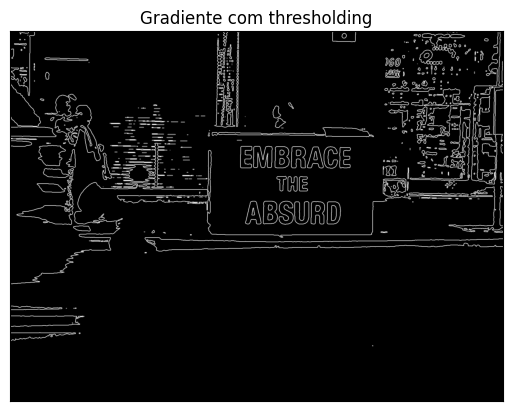

In [156]:
_, img_thresh = cv.threshold(gaussianBlur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

sobelx = cv.Sobel(img_thresh, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(img_thresh, cv.CV_64F, 0, 1, ksize=3)

mag = np.sqrt(sobelx**2 + sobely**2)

mag = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)

plt.plot(2,2,4),plt.imshow(mag,cmap = 'gray')
plt.title('Gradiente com thresholding'), plt.xticks([]), plt.yticks([])

## Canny Edge

In [160]:
originalEdges = cv.Canny(grayscales,100,200)

(Text(0.5, 1.0, 'Canny Edge - Original'), ([], []), ([], []))

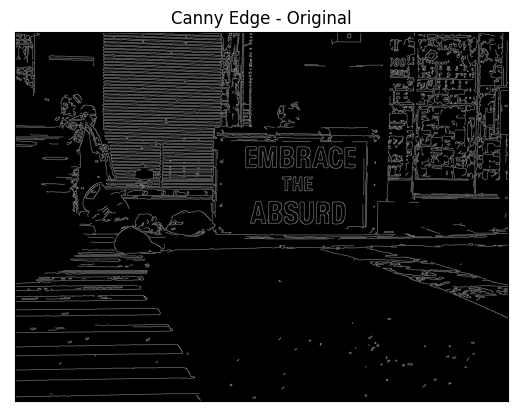

In [161]:
plt.plot(2,2,4),plt.imshow(originalEdges,cmap = 'gray')
plt.title('Canny Edge - Original'), plt.xticks([]), plt.yticks([])

In [162]:
gaussianEdges = cv.Canny(gaussianBlur, 100, 200)

(Text(0.5, 1.0, 'Canny Edge - Gaussian'), ([], []), ([], []))

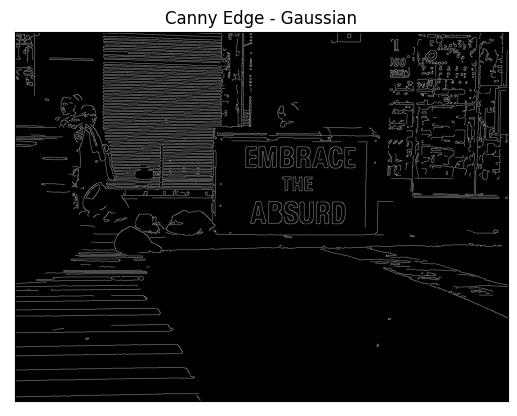

In [163]:
plt.plot(2,2,4),plt.imshow(gaussianEdges,cmap = 'gray')
plt.title('Canny Edge - Gaussian'), plt.xticks([]), plt.yticks([])

In [164]:
bilateralEdges = cv.Canny(bilateralBlur, 100, 200)

(Text(0.5, 1.0, 'Canny Edge - Bilateral'), ([], []), ([], []))

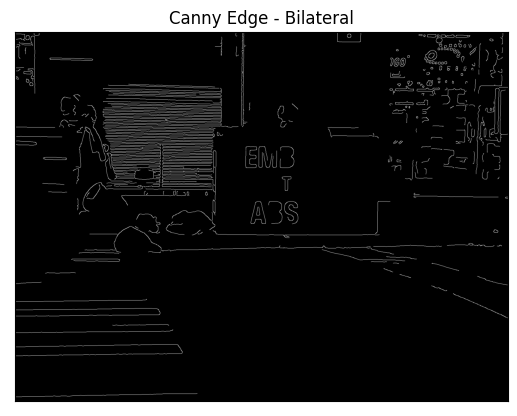

In [166]:
plt.plot(2,2,4),plt.imshow(bilateralEdges,cmap = 'gray')
plt.title('Canny Edge - Bilateral'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny Edge - Threshold'), ([], []), ([], []))

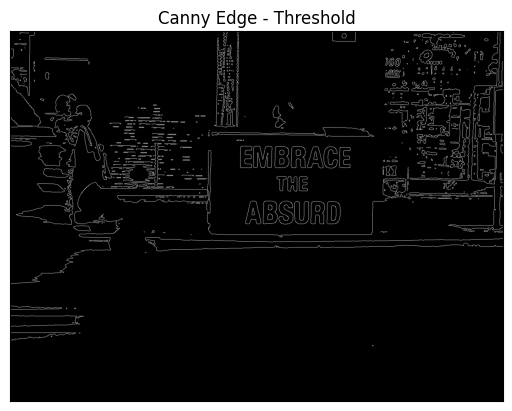

In [158]:
# combinando threshold e canny edge

_, img_thresh = cv.threshold(gaussianBlur, 127, 255, cv.THRESH_BINARY)

edges = cv.Canny(img_thresh, 100, 200)

plt.plot(2,2,4),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge - Threshold'), plt.xticks([]), plt.yticks([])

## Corner detection

In [136]:
dst = cv.cornerHarris(grayscales,6,7,0.09)

In [137]:
dst = cv.dilate(dst,None)

In [138]:
img[dst>0.01*dst.max()]=[0,0,255]

(Text(0.5, 1.0, 'Corners detected'), ([], []), ([], []))

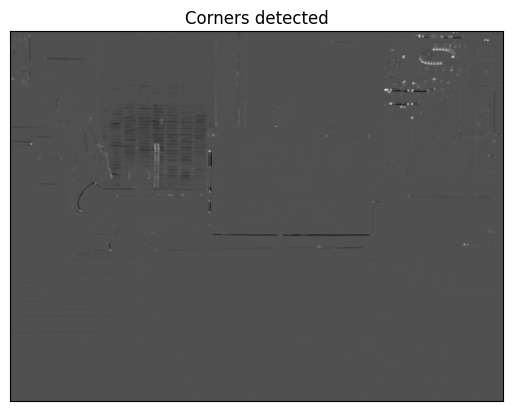

In [139]:
plt.plot(2,2,4),plt.imshow(dst,cmap = 'gray')
plt.title('Corners detected'), plt.xticks([]), plt.yticks([])